In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
# access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/MyDrive/'Colab Notebooks'/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks/'
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
# load dataset from Google Drive
bc_data = pd.read_csv(r'breast_cancer_wisconsin.csv')

# drop unnamed columns
bc_data = bc_data.drop(['id','Unnamed: 32'], axis=1)
print(bc_data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [ ]:
# extract features and labels
features = bc_data.drop('diagnosis', axis=1)
labels = bc_data.diagnosis.replace({'B': 0, 'M': 1})

print(features.head())
print(labels.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [ ]:
from sklearn.preprocessing import StandardScaler

SEED = 12345
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=SEED)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
nClass = len(np.unique(y_test))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(features.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model.add(tf.keras.layers.Dense(nClass, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

model.summary()
tf.keras.utils.plot_model(model)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 0.5697 - accuracy: 0.6960 - val_loss: 0.5022 - val_accuracy: 0.8421
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.9095 - val_loss: 0.3735 - val_accuracy: 0.8947
Epoch 3/25
25/25 [===================

In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9925
Train score: [0.04492247477173805, 0.9924623370170593]
6/6 [==============================] - 0s 7ms/step - loss: 0.0970 - accuracy: 0.9649
Test score: [0.09696651250123978, 0.9649122953414917]


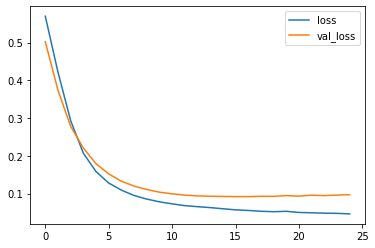

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()